In [13]:
from recommender.dataset_reader import BooksDatasetReader
%matplotlib inline

In [14]:
CFG_PATH='../config.yml'

In [15]:
reader=BooksDatasetReader(CFG_PATH)

In [16]:
users, books, ratings = reader.read_all()
#some invalid unparseable lines appear in books csv

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9

/Users/Work/env/recsys/lib/python2.7/site-packages/ipykernel/__main__.py:1: DtypeWarning: Columns (3) hav

# USERS

In [41]:
users.head(2)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


### Users with known age count

In [49]:
users_with_age=users[users['Age'].notnull()]
len(users_with_age.index)

168096

### Users without known age

In [52]:
users_without_age=users[users['Age'].isnull()]
len(users_without_age.index)

110762

### Users age histogram

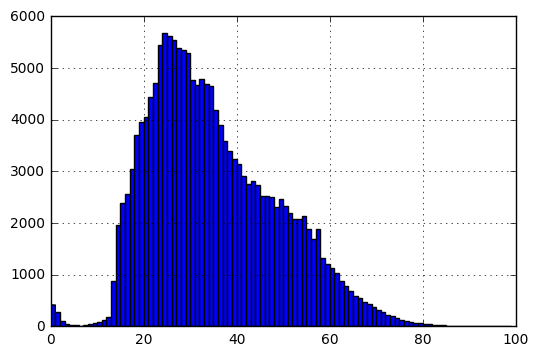

In [61]:
users_with_age['Age'].hist(bins=range(100))

#### Age is likely to be noisy but might still prove to be valuable feature. 

In [59]:
users_with_age['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

# BOOKS

In [67]:
books.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


### Book features
#### It seems that multiple books with the same title can have different ISBNs. We can expect that might be the newer edition of the same book or really multiple books with the same title.

In [68]:
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271360,271360,271358,271360,271360,271357
unique,271360,242135,102024,202,16807,271044,271044,271041
top,0880015780,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/156205791X.0...,http://images.amazon.com/images/P/042517400X.0...,http://images.amazon.com/images/P/051513628X.0...
freq,1,27,632,13903,7535,2,2,2


# Ratings
#### Explicit ratings are from 1 - 10. Implicit ratings are represented by 0.

In [24]:
ratings.head(2)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [25]:
implicit_ratings=ratings[ratings['Book-Rating']==0]
explicit_ratings=ratings[ratings['Book-Rating']>0]

#### Implicit ratings count

In [26]:
implicit_ratings['Book-Rating'].count()

716109

#### Explicit ratings count

In [27]:
explicit_ratings['Book-Rating'].count()

433671

#### Histogram of explicit ratings

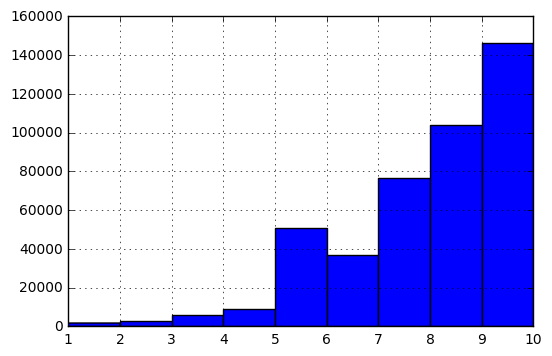

In [66]:
explicit_ratings['Book-Rating'].hist(bins=range(1,11))